<a href="https://colab.research.google.com/github/pratibha77118/23-Homework5G2/blob/data_plot/plot_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
plt.rcParams['font.size'] = 14

In [4]:
df = pd.read_csv('https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_avi_surface-flask_1_ccgg_month.txt', delimiter='\s+',skiprows = 54, names = ['site','year','month','value'])

In [5]:
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')


In [6]:
df = df.set_index('date')

In [7]:
df['months'] = [x.n for x in (df.index-df.index[0])] # Elapsed time between the time in first row and the time in subsequent row.

In [8]:
df

,site,year,month,value,months
date,,,,,
1979-04,AVI,1979,4,340.65,0
1979-05,AVI,1979,5,340.60,1
1979-06,AVI,1979,6,338.81,2
1979-07,AVI,1979,7,334.66,3
1979-08,AVI,1979,8,332.47,4
...,...,...,...,...,...
1990-04,AVI,1990,4,357.72,132
1990-05,AVI,1990,5,357.98,133
1990-06,AVI,1990,6,357.32,134


<Axes: xlabel='date'>

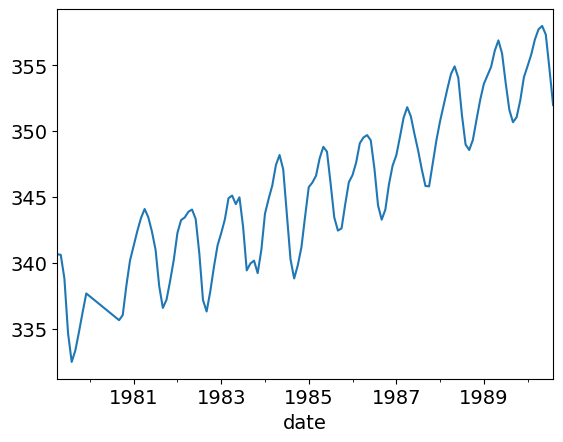

In [9]:
df['value'].plot()

In [10]:
def discrete_transform(data):
    """Return Discrete Fourier Transform (DFT) of a complex data vector"""
    N = len(data)
    transform = np.zeros(N)
    for k in range(N):
        for j in range(N):
            angle = 2 * np.pi * k * j / N
            transform[k] += data[j] * np.exp(1j * angle)
    return transform

def fft(x):
    N = len(x)
    if N <= 1: return x
    elif N % 2 == 1:         # N is odd, lemma does not apply
        print ('N is ' + str(N) + ', fall back to discrete transform')
        return discrete_transform(x)
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
                     [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )


In [11]:
X= fft(df['value'][-130:])

N is 129, fall back to discrete transform


<ipython-input-10-67ebc42db86b>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  transform[k] += data[j] * np.exp(1j * angle)


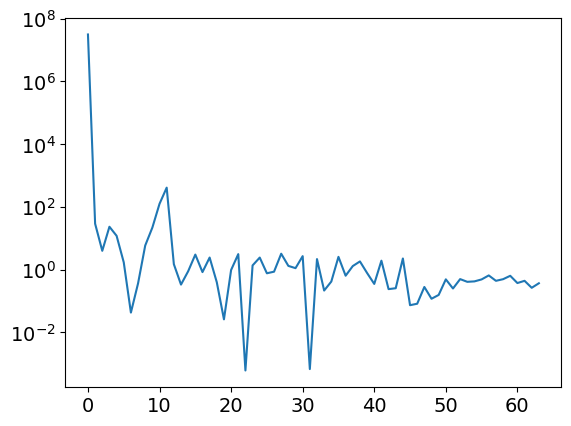

In [12]:
plt.plot(np.abs(X[:int(len(X)/2)])**2/int(len(X)/2))
plt.yscale("log")

In [13]:
Heavyside = np.append(np.zeros_like(X[:50]), np.ones_like(X[50:]))

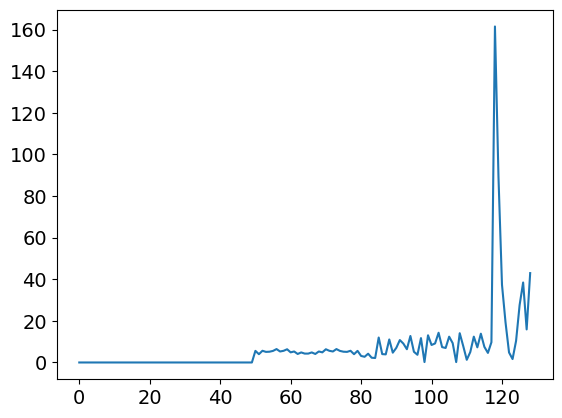

In [14]:
plt.plot(Heavyside*np.abs(X))


N is 129, fall back to discrete transform


<ipython-input-10-67ebc42db86b>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  transform[k] += data[j] * np.exp(1j * angle)


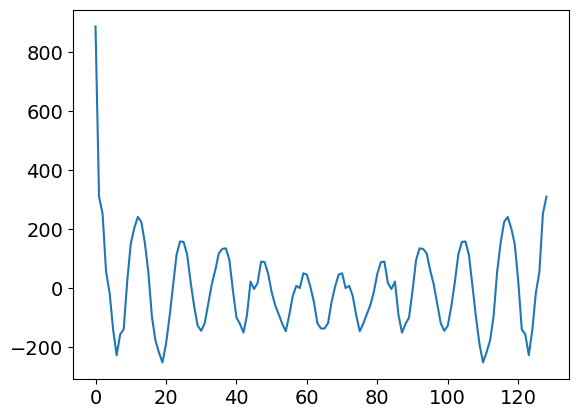

In [15]:
plt.plot(fft(Heavyside[:130]*np.abs(X[:130])))